<a href="https://colab.research.google.com/github/bivekpok/DSPS_BPokhrel/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scipy
import math

In [286]:
eqs = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/earthquakes.csv', skipinitialspace=True, sep = ' ')

In [287]:
eqs

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.24600,-116.43300,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.94500,-116.29500,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.34300,-117.62800,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.66800,-116.78000,13.8,C,28270,19,40
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.96300,-116.29000,2.7,C,28553,40,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70793,2002/12/29,19:37:24.56,eq,l,2.21,l,35.31400,-118.66767,3.7,A,9874709,25,948
70794,2002/12/29,20:17:33.40,eq,l,2.02,l,35.32133,-118.66000,1.8,A,9874745,48,245
70795,2002/12/29,20:21:28.73,eq,l,2.07,l,35.32150,-118.66617,1.9,A,9874749,53,277
70796,2002/12/30,21:51:52.55,eq,l,2.31,l,35.31867,-118.66250,1.5,A,9875017,66,404


In [288]:
eqs.rename({'#YYY/MM/DD': 'date','HH:mm:SS.ss' : 'time'}, axis =1, inplace = True)

In [289]:
eqs

,date,time,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.24600,-116.43300,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.94500,-116.29500,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.34300,-117.62800,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.66800,-116.78000,13.8,C,28270,19,40
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.96300,-116.29000,2.7,C,28553,40,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70793,2002/12/29,19:37:24.56,eq,l,2.21,l,35.31400,-118.66767,3.7,A,9874709,25,948
70794,2002/12/29,20:17:33.40,eq,l,2.02,l,35.32133,-118.66000,1.8,A,9874745,48,245
70795,2002/12/29,20:21:28.73,eq,l,2.07,l,35.32150,-118.66617,1.9,A,9874749,53,277
70796,2002/12/30,21:51:52.55,eq,l,2.31,l,35.31867,-118.66250,1.5,A,9875017,66,404


In [290]:
eqs.iloc[0]['date'] + '  ' + eqs.iloc[0]['time']

'1984/01/01  01:30:57.52'

In [291]:
eqs['date_time'] = [eqs.iloc[i]['date'] + '  ' + eqs.iloc[i]['time'] for i in range(eqs.shape[0])]
eqs.drop(columns = ['date','time'], axis= 1, inplace = True)

In [292]:

columns = eqs.columns.tolist()
columns = [columns[-1]] + columns[:-1]
columns

['date_time',
 'ET',
 'GT',
 'MAG',
 'M',
 'LAT',
 'LON',
 'DEPTH',
 'Q',
 'EVID',
 'NPH',
 'NGRM']

In [293]:
eqs = eqs[columns]
eqs

,date_time,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01 01:30:57.52,eq,l,2.02,c,33.24600,-116.43300,1.6,C,28255,13,17
1,1984/01/01 05:31:34.16,eq,l,2.12,c,32.94500,-116.29500,5.4,C,28259,18,42
2,1984/01/01 06:59:05.14,eq,l,2.43,c,33.34300,-117.62800,5.6,C,28260,13,30
3,1984/01/01 11:10:25.29,eq,l,2.07,c,33.66800,-116.78000,13.8,C,28270,19,40
4,1984/01/01 19:38:19.79,eq,l,2.13,c,33.96300,-116.29000,2.7,C,28553,40,49
...,...,...,...,...,...,...,...,...,...,...,...,...
70793,2002/12/29 19:37:24.56,eq,l,2.21,l,35.31400,-118.66767,3.7,A,9874709,25,948
70794,2002/12/29 20:17:33.40,eq,l,2.02,l,35.32133,-118.66000,1.8,A,9874745,48,245
70795,2002/12/29 20:21:28.73,eq,l,2.07,l,35.32150,-118.66617,1.9,A,9874749,53,277
70796,2002/12/30 21:51:52.55,eq,l,2.31,l,35.31867,-118.66250,1.5,A,9875017,66,404


In [294]:
eqs['date_time'][1723]

'1984/08/09  04:48:60.00'

In [295]:
eqs['date_time'] = eqs['date_time'].str.replace(r'60.00$','59.00')


<ipython-input-295-2445fb305684>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  eqs['date_time'] = eqs['date_time'].str.replace(r'60.00$','59.00')


In [296]:
eqs['date_time'] = pd.to_datetime(eqs['date_time'])

In [297]:
# eqs['date_time'] = pd.to_datetime(eqs['date_time'],errors = 'coerce')

# # Filter rows where the datetime conversion resulted in NaT (Not a Timestamp)
# invalid_time_rows = eqs[eqs['date_time'].isna()]

# # Display the rows with invalid time formatting
# print(invalid_time_rows)

Text(0, 0.5, 'Counts')

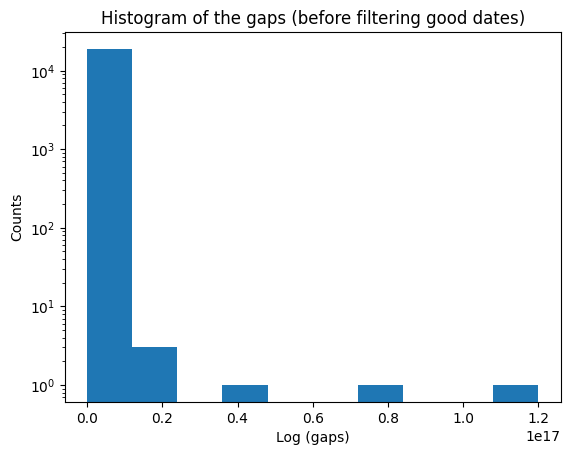

In [298]:
eq_good['gaps'].plot(kind = 'hist', bins =10, logy = True, title = 'Histogram of the gaps (before filtering good dates)')
plt.xlabel('Log (gaps)')
plt.ylabel('Counts')

In [299]:
ss = []
for t in [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]:

    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    print(t)
    a = pd.to_datetime(int(t[0]), format="%Y") + pd.Timedelta(days=((t[0] - int(t[0])) * 365.25))
    b = pd.to_datetime(int(t[1]), format="%Y") + pd.Timedelta(days=((t[1] - int(t[1])) * 365.25))

    ss.append((a, b))

(1984, 1986.5)
(1990.3, 1992.1)
(1994.6, 1995.6)
(1996.1, 1996.5)
(1997, 1997.6)
(1997.75, 1998.15)
(1998.25, 1999.35)
(2000.55, 2000.8)
(2000.9, 2001.25)
(2001.6, 2002)
(2002.5, 2003)


In [300]:
# data between start and end of first time period
eqdata = eqs
gooddates = (((eqdata.date_time >= ss[0][0]) * (eqdata.date_time <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqdata.date_time >=ss [1][0]) * (eqdata.date_time <= ss[1][1])) +\
        ((eqdata.date_time >=ss [2][0]) * (eqdata.date_time <= ss[2][1])) +\
        ((eqdata.date_time >=ss [3][0]) * (eqdata.date_time <= ss[3][1])) +\
        ((eqdata.date_time >=ss [4][0]) * (eqdata.date_time <= ss[4][1])) +\
        ((eqdata.date_time >=ss [5][0]) * (eqdata.date_time <= ss[5][1])) +\
        ((eqdata.date_time >=ss [6][0]) * (eqdata.date_time <= ss[6][1])) +\
        ((eqdata.date_time >=ss [7][0]) * (eqdata.date_time <= ss[7][1])) +\
        ((eqdata.date_time >=ss [8][0]) * (eqdata.date_time <= ss[8][1])) +\
        ((eqdata.date_time >=ss [9][0]) * (eqdata.date_time <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqdata.date_time >=ss [10][0]) * (eqdata.date_time <= ss[10][1])\
        ).values)
print(gooddates)

0        True
1        True
2        True
3        True
4        True
         ... 
70793    True
70794    True
70795    True
70796    True
70797    True
Name: date_time, Length: 70798, dtype: bool


In [301]:
eq_good = eqs[gooddates]
eq_good

,date_time,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984-01-01 01:30:57.520,eq,l,2.02,c,33.24600,-116.43300,1.6,C,28255,13,17
1,1984-01-01 05:31:34.160,eq,l,2.12,c,32.94500,-116.29500,5.4,C,28259,18,42
2,1984-01-01 06:59:05.140,eq,l,2.43,c,33.34300,-117.62800,5.6,C,28260,13,30
3,1984-01-01 11:10:25.290,eq,l,2.07,c,33.66800,-116.78000,13.8,C,28270,19,40
4,1984-01-01 19:38:19.790,eq,l,2.13,c,33.96300,-116.29000,2.7,C,28553,40,49
...,...,...,...,...,...,...,...,...,...,...,...,...
70793,2002-12-29 19:37:24.560,eq,l,2.21,l,35.31400,-118.66767,3.7,A,9874709,25,948
70794,2002-12-29 20:17:33.400,eq,l,2.02,l,35.32133,-118.66000,1.8,A,9874745,48,245
70795,2002-12-29 20:21:28.730,eq,l,2.07,l,35.32150,-118.66617,1.9,A,9874749,53,277
70796,2002-12-30 21:51:52.550,eq,l,2.31,l,35.31867,-118.66250,1.5,A,9875017,66,404


In [302]:
eq_good = eq_good[['date_time', 'MAG']]

In [303]:
eq_good = eq_good[eq_good['MAG'] >= 2] # filter only with magnitude greater than 2

In [304]:
eq_good

,date_time,MAG
0,1984-01-01 01:30:57.520,2.02
1,1984-01-01 05:31:34.160,2.12
2,1984-01-01 06:59:05.140,2.43
3,1984-01-01 11:10:25.290,2.07
4,1984-01-01 19:38:19.790,2.13
...,...,...
70793,2002-12-29 19:37:24.560,2.21
70794,2002-12-29 20:17:33.400,2.02
70795,2002-12-29 20:21:28.730,2.07
70796,2002-12-30 21:51:52.550,2.31


In [305]:
import numpy as np
print(eq_good['date_time'].values)
eq_good['gaps'] = eq_good['date_time'].diff().dt.total_seconds() * 1e9

['1984-01-01T01:30:57.520000000' '1984-01-01T05:31:34.160000000'
 '1984-01-01T06:59:05.140000000' ... '2002-12-29T20:21:28.730000000'
 '2002-12-30T21:51:52.550000000' '2002-12-30T23:38:49.790000000']


In [306]:
eq_good = eq_good.dropna(subset=['gaps'])

In [307]:
eq_good.describe()

,MAG,gaps
count,18853.000000,1.885300e+04
mean,2.399406,3.179987e+13
std,0.392424,1.104074e+15
min,2.000000,1.700000e+08
25%,2.110000,2.733640e+12
50%,2.290000,8.938520e+12
75%,2.560000,2.131018e+13
max,5.800000,1.199386e+17


<Axes: title={'center': 'Histogram of Magnitude including greater than a month gaps '}, ylabel='Frequency'>

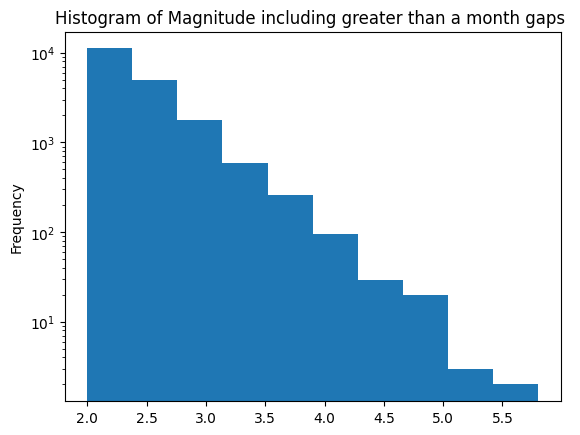

In [308]:
eq_good['MAG'].plot(kind = 'hist', bins =10, logy = True, title = 'Histogram of Magnitude including greater than a month gaps ')

In [309]:
eq_final = eq_good[eq_good['gaps'] < 10**9*30*24*60*60] ## only within a month gaps taken

Text(0, 0.5, 'Counts')

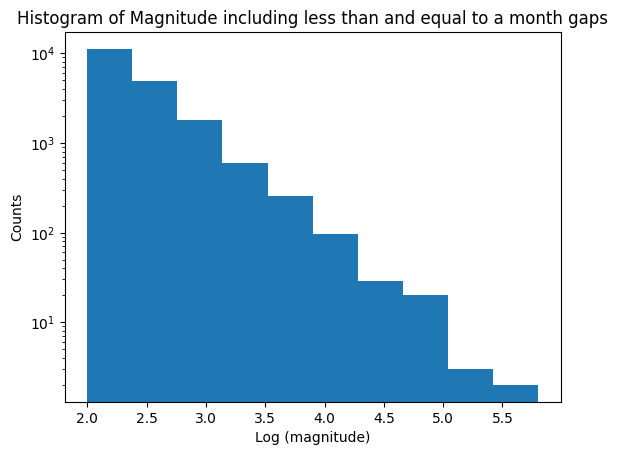

In [310]:
eq_final['MAG'].plot(kind = 'hist', bins =10, logy = True, title = 'Histogram of Magnitude including less than and equal to a month gaps' )
plt.xlabel('Log (magnitude)')
plt.ylabel('Counts')

In [311]:
eq_final.describe()

,MAG,gaps
count,18843.000000,1.884300e+04
mean,2.399448,1.553502e+13
std,0.392475,1.879211e+13
min,2.000000,1.700000e+08
25%,2.110000,2.732745e+12
50%,2.290000,8.929370e+12
75%,2.560000,2.128393e+13
max,5.800000,2.365828e+14


Text(0, 0.5, 'Counts')

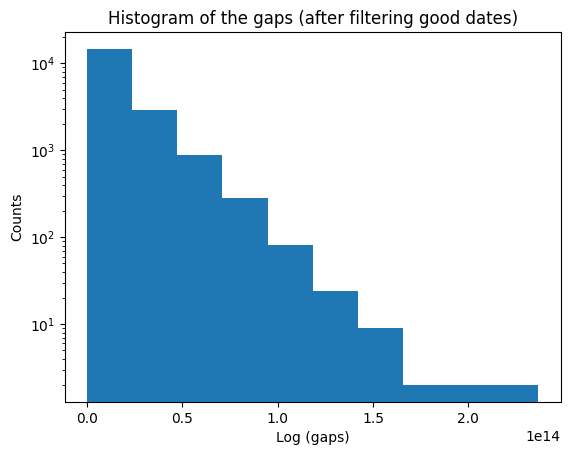

In [312]:
eq_final['gaps'].plot(kind = 'hist', bins =10, logy = True, title = 'Histogram of the gaps (after filtering good dates)')
plt.xlabel('Log (gaps)')
plt.ylabel('Counts')

In [313]:
eq_good.describe()

,MAG,gaps
count,18853.000000,1.885300e+04
mean,2.399406,3.179987e+13
std,0.392424,1.104074e+15
min,2.000000,1.700000e+08
25%,2.110000,2.733640e+12
50%,2.290000,8.938520e+12
75%,2.560000,2.131018e+13
max,5.800000,1.199386e+17


## removing the first 10 smallest samples after dividing by mean  as suggested in Section3 para 3


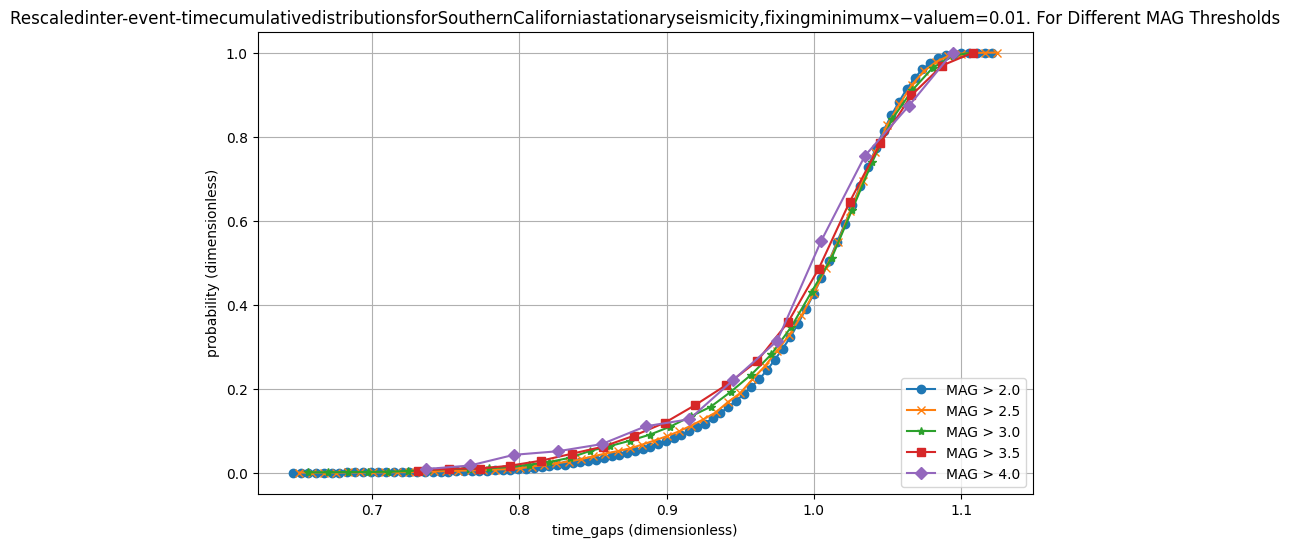

In [314]:
import numpy as np
import matplotlib.pyplot as plt

# Define a list of MAG thresholds
mag_thresholds = [2.0, 2.5, 3.0, 3.5, 4.0]
markers = ['o', 'x', '*', 's', 'D']

# Initialize empty lists to store the results
cb_list = []
cs_list = []

# Loop through the MAG thresholds and process each dataset
for mag_threshold in mag_thresholds:
    # Filter the dataset based on the MAG threshold
    x = np.sort(np.log10(eq_final[eq_final['MAG'] > mag_threshold]['gaps']))

    # Calculate cumulative distribution and center bin values
    def hist_bin(x):
        hist, bins = np.histogram(x, bins='auto')
        cb = (bins[:-1] + bins[1:]) / 2
        cs = np.cumsum(hist) / np.sum(hist)
        return cb, cs

    def c_mean(x):
        fmx = np.mean(x)
        x = x / fmx
        x1 = x[x > 0.01]
        smx = np.mean(x1)
        x1 = x1 / smx
        cb, cs = hist_bin(x1)
        return cb, cs

    cb, cs = c_mean(x)

    # Append the results to the lists
    cb_list.append(cb)
    cs_list.append(cs)

# Create a plot to display all cumulative distribution curves
plt.figure(figsize=(10, 6))  # Set the figure size

for cb, cs, marker in zip(cb_list, cs_list, markers):
    plt.plot(cb, cs, marker=marker)

plt.xlabel('time_gaps (dimensionless)')
plt.ylabel('probability (dimensionless)')
plt.title('Rescaledinter-event-timecumulativedistributionsforSouthernCaliforniastationaryseismicity,fixingminimumx−valuem=0.01. For Different MAG Thresholds')
plt.legend([f'MAG > {mag}' for mag in mag_thresholds], loc='lower right')
plt.grid(True)
plt.show()
